<a href="https://colab.research.google.com/github/Sahab00/uni_work_collab/blob/main/complete_preproccessing_titatic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving test_Titanic.csv to test_Titanic (1).csv


In [ ]:
df= pd.read_csv("test_Titanic.csv")

In [ ]:
df.head(5)

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.tail(5)

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Gender,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:

drop_col = ['PassengerId', 'Name', 'Ticket', 'Cabin']

# Drop the columns from the dataset
data =df.drop(columns=drop_col, inplace=True)



In [ ]:
df.sample(4)

,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
101,2,male,27.0,1,0,26.0000,S
188,3,female,NaN,8,2,69.5500,S
11,1,male,46.0,0,0,26.0000,S
23,1,male,21.0,0,1,61.3792,C


In [ ]:
df.dtypes

,0
Pclass,int64
Gender,object
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [ ]:
#handling missing values of age
print(df['Age'])

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64


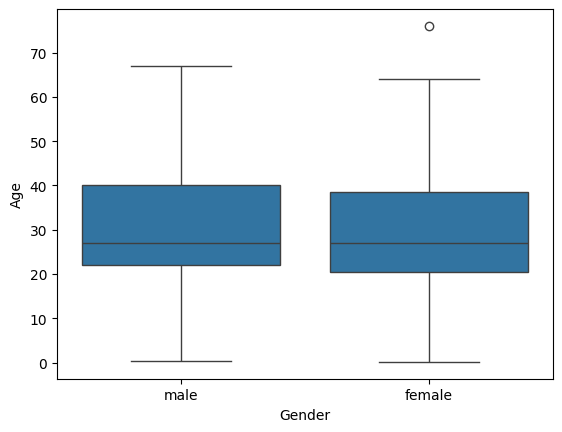

In [ ]:
plt.figsize=(10,6)
box_plot= sns.boxplot(x= df.Gender, y=df.Age, data= df)

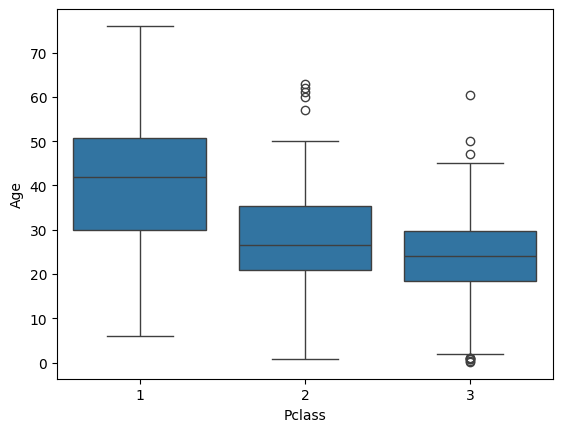

In [ ]:
plt.figsize=(10,6)
box_plot= sns.boxplot(x= df.Pclass, y=df.Age, data= df)

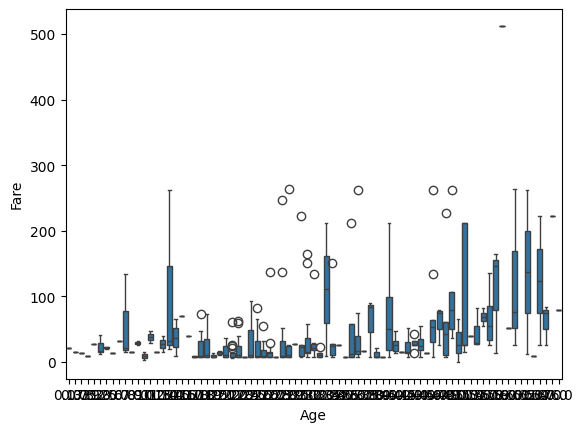

In [ ]:
plt.figsize=(10,6)
box_plot= sns.boxplot(x= df.Age, y=df.Fare, data= df)

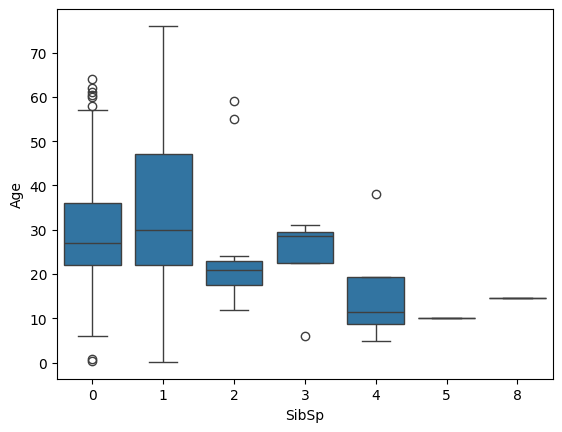

In [ ]:
plt.figsize=(10,6)
box_plot= sns.boxplot(x= df.SibSp, y=df.Age, data= df)

In [ ]:
#replcing missing values of age by its median

In [ ]:
print("Median of Age is:" , df.Age.median())

Median of Age is: 27.0


In [ ]:
# filling with median
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Age']

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
413,27.0
414,39.0
415,38.5
416,27.0


In [ ]:
df.isnull().sum()

,0
Pclass,0
Gender,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
#Misisng vakue of Fare
df.fillna(0, inplace=True)
df.isnull().sum()


,0
Pclass,0
Gender,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


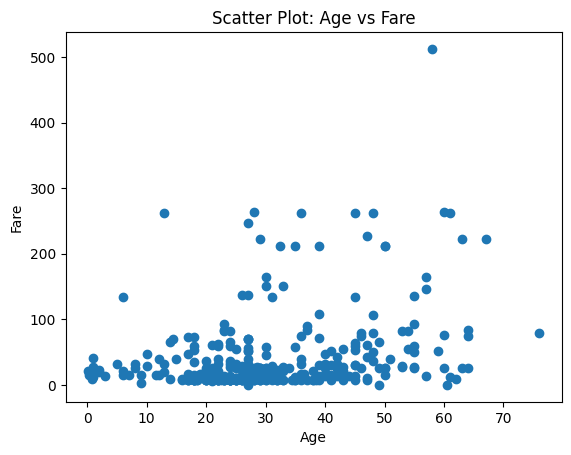

In [ ]:
import matplotlib.pyplot as plt

# Example: Scatter plot between 'Age' and 'Fare'
plt.scatter(df['Age'], df['Fare'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter Plot: Age vs Fare')

# Display the plot
plt.show()


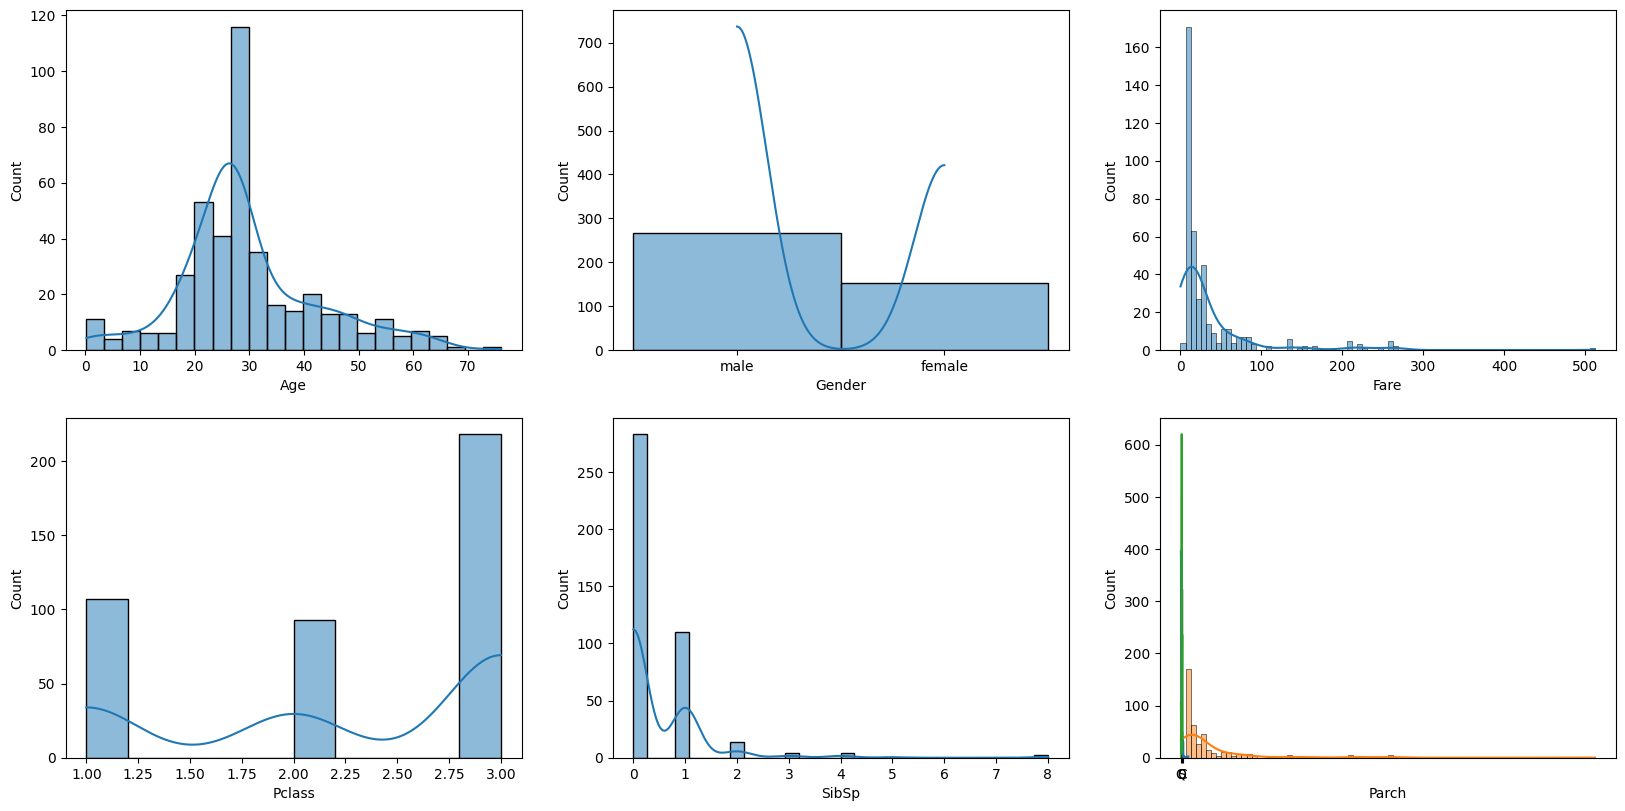

In [ ]:
# Applying subplots for histogram plots
plt.figure(figsize=(20, 15))
plt.subplot(3, 3, 1)
sns.histplot(df['Age'], kde=True)
plt.subplot(3, 3, 2)
sns.histplot(df['Gender'], kde=True)
plt.subplot(3, 3, 3)
sns.histplot(df['Fare'], kde=True)
plt.subplot(3, 3, 4)
sns.histplot(df['Pclass'], kde=True)
plt.subplot(3, 3, 5)
sns.histplot(df['SibSp'], kde=True)
plt.subplot(3, 3, 6)
sns.histplot(df['Parch'], kde=True)
plt.subplot(3, 3, 6)
sns.histplot(df['Fare'], kde=True)
plt.subplot(3, 3, 6)
sns.histplot(df['Embarked'], kde=True)

plt.show()

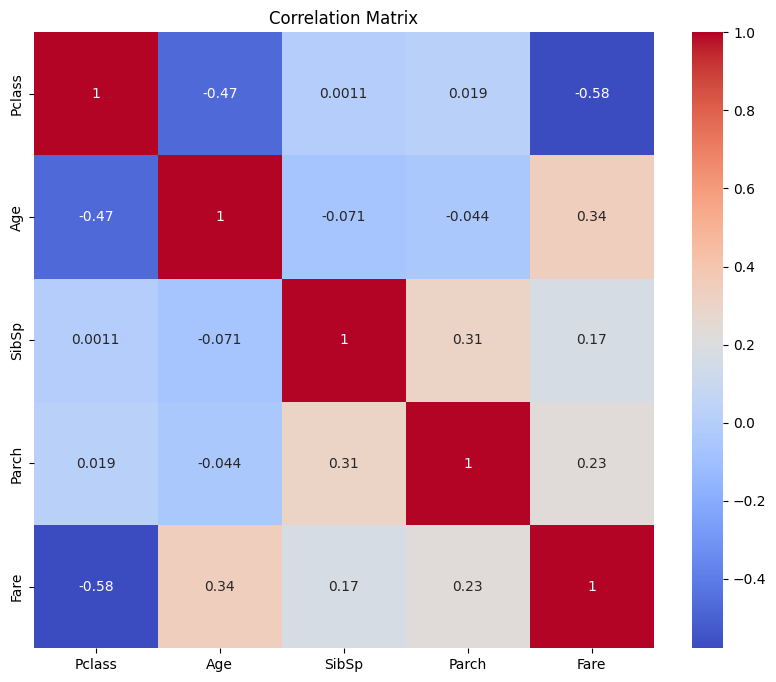

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected list of numerical columns (removing 'Embarked' as it's categorical)
numerical_columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']  # Only include numerical columns

# Calculate the correlation matrix for the numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')

# Add title and show the plot
plt.title('Correlation Matrix')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to the 'product_category' column
df['Gender'] = le.fit_transform(df['Gender'])


In [ ]:
df.dtypes

,0
Pclass,int64
Gender,int64
Age,float64
SibSp,int64
Parch,int64
Fare,float64
Embarked,object


In [ ]:
df['Gender']

,Gender
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
le = LabelEncoder()

# Apply label encoding to the 'product_category' column
df['Embarked'] = le.fit_transform(df['Embarked'])


In [ ]:
df.dtypes

,0
Pclass,int64
Gender,int64
Age,int64
SibSp,int64
Parch,int64
Fare,int64
Embarked,int64


In [ ]:
df['Embarked']

,Embarked
0,1
1,2
2,1
3,2
4,2
...,...
413,2
414,0
415,2
416,2


In [ ]:
# Converting 'Age' column from continuous to discrete
df['Age'] = df['Age'].astype(int)

print(df['Age'].min())  # Minimum value
print(df['Age'].max())  # Maximum value


0
76


In [ ]:
def bucketize_price(price):
    if price <= 30:
        return 0  # Low Price
    elif price <= 50:
        return 1  # Medium Price
    elif price <= 70:
        return 2  # High Price
    else:
        return -1  # Out of expected range


df['Age'] = df['Age'].apply(bucketize_price)

df.head()


,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,3,1,0,0,0,0,1
1,3,0,0,1,0,0,2
2,2,1,0,0,0,0,1
3,3,1,0,0,0,0,2
4,3,0,0,1,1,0,2


In [ ]:
from google.colab import files
df.to_csv('sales_processed.csv', index=False)

# Trigger file download
files.download('sales_processed.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>